IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np

IMPORITNG THE DATA FILE IN THE ENVIRONMENT

In [2]:
data = pd.read_csv("Final.csv")
data.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [3]:
print(data.shape)

(1101925, 16)


In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

SEE IF MISSING VALUES ARE PRESENT OR NOT

In [5]:
print(data.isnull().sum())


CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64


replacing null values ny Nan

In [6]:
data.replace(to_replace=[None, ''], value=np.nan, inplace=True)


Change the format of ORDER_CREATION_DATE to datetime[64] with format "%Y%m%d

In [7]:
data['ORDER_CREATION_DATE'] = pd.to_datetime(data['ORDER_CREATION_DATE'], format='%Y%m%d')
print(data['ORDER_CREATION_DATE'])

0         2022-01-01
1         2022-01-01
2         2022-01-01
3         2022-01-01
4         2022-01-01
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: ORDER_CREATION_DATE, Length: 1101925, dtype: datetime64[ns]


Change the format of REQUESTED_DELIVERY_DATE to datetime[64] with format "%Y%m%d"


In [8]:
data['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(data['REQUESTED_DELIVERY_DATE'], format='%Y%m%d')


Count how many records have order date greater than delivery date

In [9]:
print((data['ORDER_CREATION_DATE'] > data['REQUESTED_DELIVERY_DATE']).sum())

27142


Remove records where order date is greater than delivery date

In [10]:
data = data[data['ORDER_CREATION_DATE'] <= data['REQUESTED_DELIVERY_DATE']]

Check the number of records where the ORDER_AMOUNT field has "-"

In [11]:
print((data['ORDER_AMOUNT'].str.contains('-').sum()))

32


Replace "-" with "" from the "ORDER_AMOUNT" field

In [12]:
data['ORDER_AMOUNT'] = data['ORDER_AMOUNT'].astype(str).str.replace('-', '')

Check the number of records where the ORDER_AMOUNT field has ","

In [13]:
print((data['ORDER_AMOUNT'].str.contains(',')).sum())

1073406


Replace "," with "." from the "ORDER_AMOUNT" field

In [14]:
data['ORDER_AMOUNT'] = data['ORDER_AMOUNT'].astype(str).str.replace(',', '.')

data['ORDER_AMOUNT'] = pd.to_numeric(data['ORDER_AMOUNT'], errors='coerce')
# convert string to numeric
print(data['ORDER_AMOUNT'])

0            954.61
1            787.36
2          67493.46
3           1405.54
4              0.00
             ...   
1101920     4415.19
1101921        0.00
1101922        0.00
1101923        0.00
1101924     4415.19
Name: ORDER_AMOUNT, Length: 1074783, dtype: float64


In [15]:
# data['ORDER_AMOUNT'] = data['ORDER_AMOUNT'].astype(str).str.replace(',', '')

# data['ORDER_AMOUNT'] = pd.to_numeric(data['ORDER_AMOUNT'], errors='coerce')
# print(data['ORDER_AMOUNT'])

Count the number of records where order date and delivery date are same

In [16]:
print((data['ORDER_CREATION_DATE'].dt.date == data['REQUESTED_DELIVERY_DATE'].dt.date).sum())

100437


count the number of records for each currency type using the "ORDER_CURRENCY" field

In [17]:
print(data['ORDER_CURRENCY'].value_counts())


USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64


Create a new column in the DataFrame called "amount_in_usd" and convert all non-USD currencies to USD

In [18]:
usd_conversion_rates = {
    'USD': 1.0,
    'EUR': 1.08,
    'AUD': 0.66,
    'CAD': 0.74,
    'GBP': 1.24,
    'MYR': 0.22,
    'PLN': 0.24,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.11,
    'RON': 0.22,
    'SGD': 0.74,
    'CZK': 0.046,
    'HU1': 0.0028,
    'NZD': 0.61,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.25,
    'SEK': 0.094
}

converting order amount to numeric and converting every amount in USD

In [19]:
data['AMOUNT_IN_USD'] = data.apply(lambda row: row['ORDER_AMOUNT'] * usd_conversion_rates.get(row['ORDER_CURRENCY'], np.nan), axis=1)

In [20]:
print(data['AMOUNT_IN_USD'])

0           1030.9788
1            850.3488
2          72892.9368
3           1517.9832
4              0.0000
              ...    
1101920     3267.2406
1101921        0.0000
1101922        0.0000
1101923        0.0000
1101924     3267.2406
Name: AMOUNT_IN_USD, Length: 1074783, dtype: float64


Check for values of 0 in the "amount_in_usd" column

In [21]:
print((data['AMOUNT_IN_USD'] == 0).sum())

237821


Create a new column in the DataFrame called "unique_cust_id" by adding CUSTOMER_NUMBER and COMPANY_CODE

In [22]:
data['UNIQUE_CUST_ID'] = data['CUSTOMER_NUMBER'].astype(str) + data['COMPANY_CODE'].astype(str)
print(data['UNIQUE_CUST_ID'])


0            123118073220
1            123118073220
2            121187583260
3          12104997703290
4          12103514003290
                ...      
1101920    12103318044260
1101921    12103318044260
1101922    12103318114260
1101923    12103318114260
1101924    12103318044260
Name: UNIQUE_CUST_ID, Length: 1074783, dtype: object


In [23]:
data


,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000,12103514003290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,Germany,South-Region,"0,00",NaN,4260,2022-06-01,74357,NR02,946056501,4415.19,2022-06-01,SGD,NaN,1210331804,3267.2406,12103318044260
1101921,998890898,4509,Armenia,South-Region,"0,00",NaN,4260,2022-06-01,84052,NR04,894775488,0.00,2022-06-01,SGD,NaN,1210331804,0.0000,12103318044260
1101922,983330221,3951,Nepal,South-Region,"0,00",NaN,4260,2022-06-01,85322,NR01,909729781,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,12103318114260
1101923,926668029,3235,Panama,South-Region,"0,00",NaN,4260,2022-06-01,90538,SR04,940836817,0.00,2022-06-01,SGD,NaN,1210331811,0.0000,12103318114260


# Milestone 2

# H2H10688K_Anusthan_Singh



Importing Dependencies

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,SOLD_TO_PARTY,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,AMOUNT_IN_USD,UNIQUE_CUST_ID
0,946851639,3537,United States of America,South-Region,"0,00",1000,3220,2022-01-01,43012,SR02,756141537,954.61,2022-01-13,EUR,NaN,12311807,1030.9788,123118073220
1,963432061,3449,Martinique,South-Region,"0,00",1000,3220,2022-01-01,43114,NR03,798847812,787.36,2022-01-11,EUR,NaN,12311807,850.3488,123118073220
2,971991639,3238,Moldova,South-Region,"82342,02",I200,3260,2022-01-01,110019,NR01,960984659,67493.46,2022-01-12,EUR,93.0,12118758,72892.9368,121187583260
3,754349803,3911,United Arab Emirates,South-Region,"1471,24",N000,3290,2022-01-01,153013,SR02,925857642,1405.54,2022-01-06,EUR,93.0,1210499770,1517.9832,12104997703290
4,930253442,2381,Greece,South-Region,"0,00",N000,3290,2022-01-01,160020,SR01,947942786,0.00,2022-01-06,EUR,64.0,1210351400,0.0000,12103514003290


1.Creating Histogram on 'Distribution channel'

<Axes: xlabel='DISTRIBUTION_CHANNEL', ylabel='Count'>

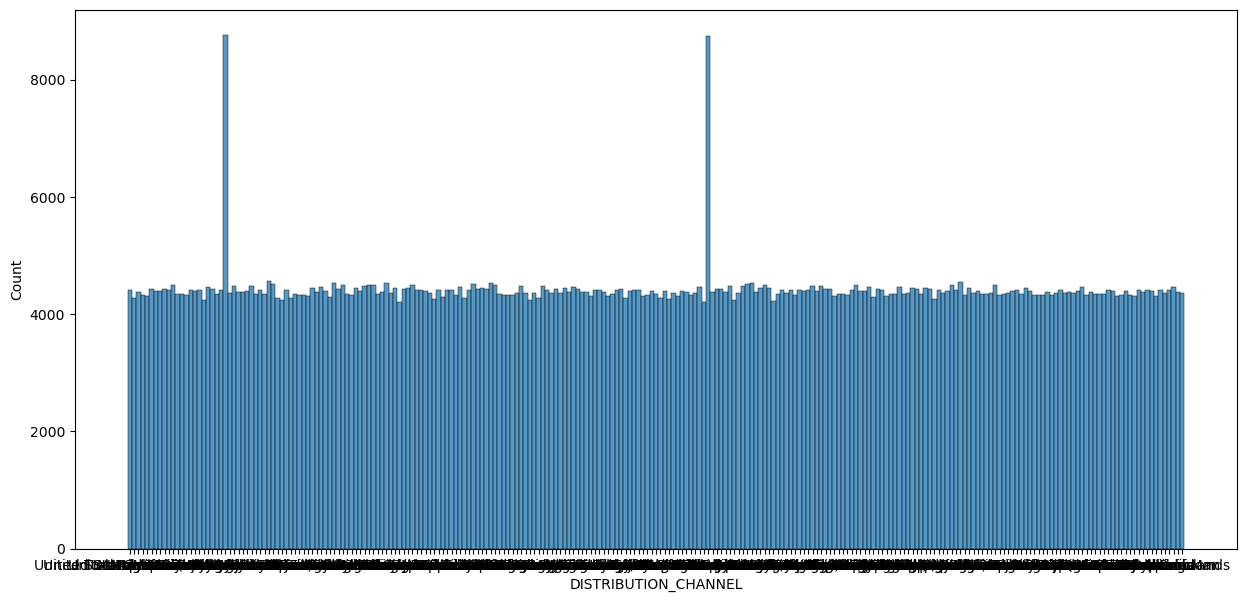

In [27]:
plt.figure(figsize=(15,7))
sns.histplot(x='DISTRIBUTION_CHANNEL',data=data)

2.Creating Pie Chart on 'Order Currency'

In [29]:
no_currency=data['ORDER_CURRENCY'].value_counts()
no_currency

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

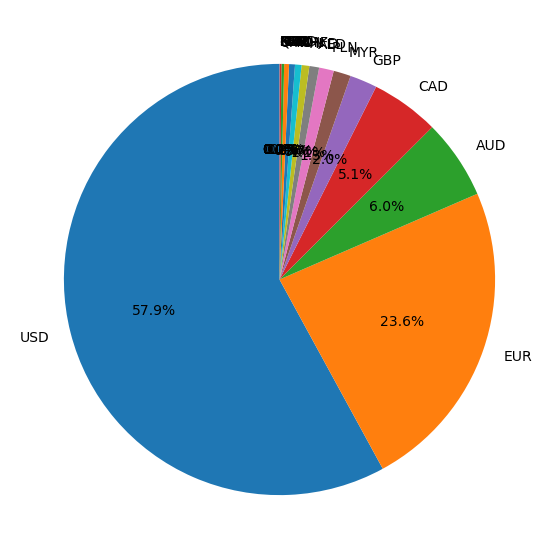

In [30]:
plt.figure(figsize=(10,7))
plt.pie(no_currency,labels=no_currency.index,autopct='%1.1f%%', startangle=90)
plt.show()

3.Creating Line Chart on 'Purchase Order Type' and 'Distribution Channel'

<Axes: xlabel='PURCHASE_ORDER_TYPE', ylabel='DISTRIBUTION_CHANNEL'>

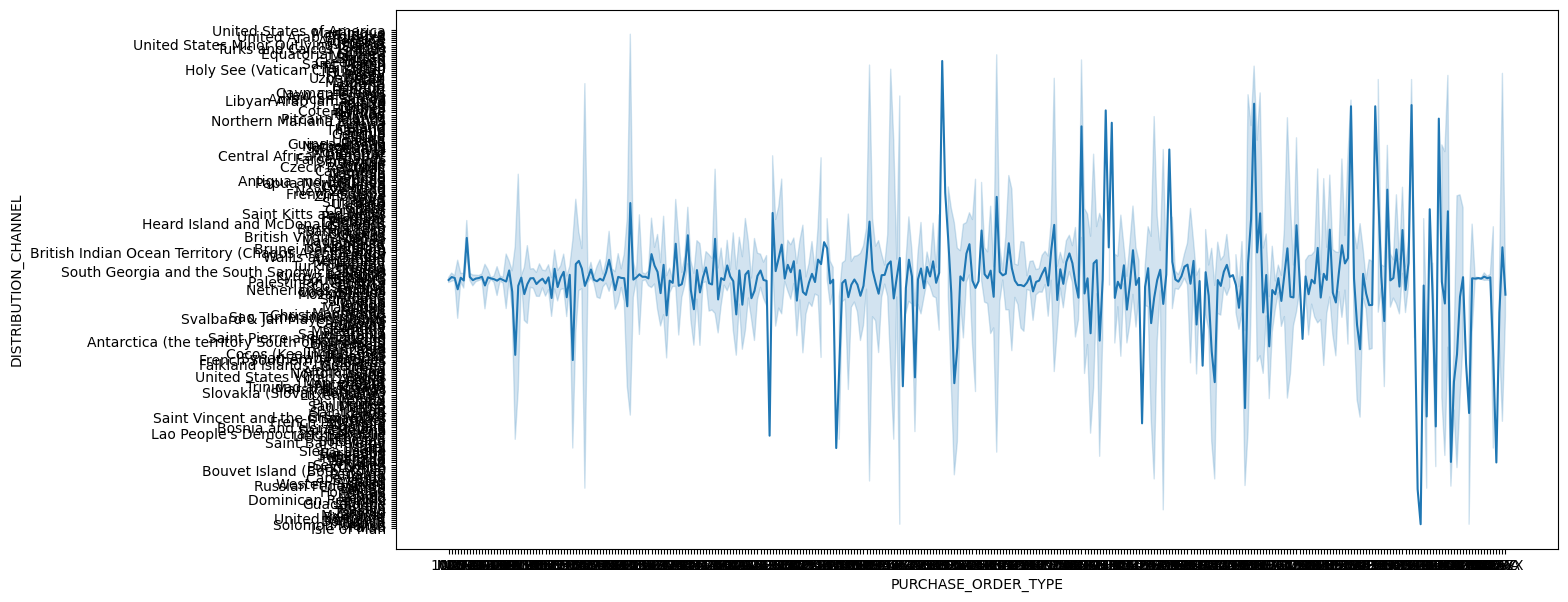

In [32]:
plt.figure(figsize=(15,7))
sns.lineplot(x='PURCHASE_ORDER_TYPE',y='DISTRIBUTION_CHANNEL',data=data)

4.Creating Line chart on 'Order Creation Date' and 'Amount In USD'

<Axes: xlabel='ORDER_CREATION_DATE', ylabel='AMOUNT_IN_USD'>

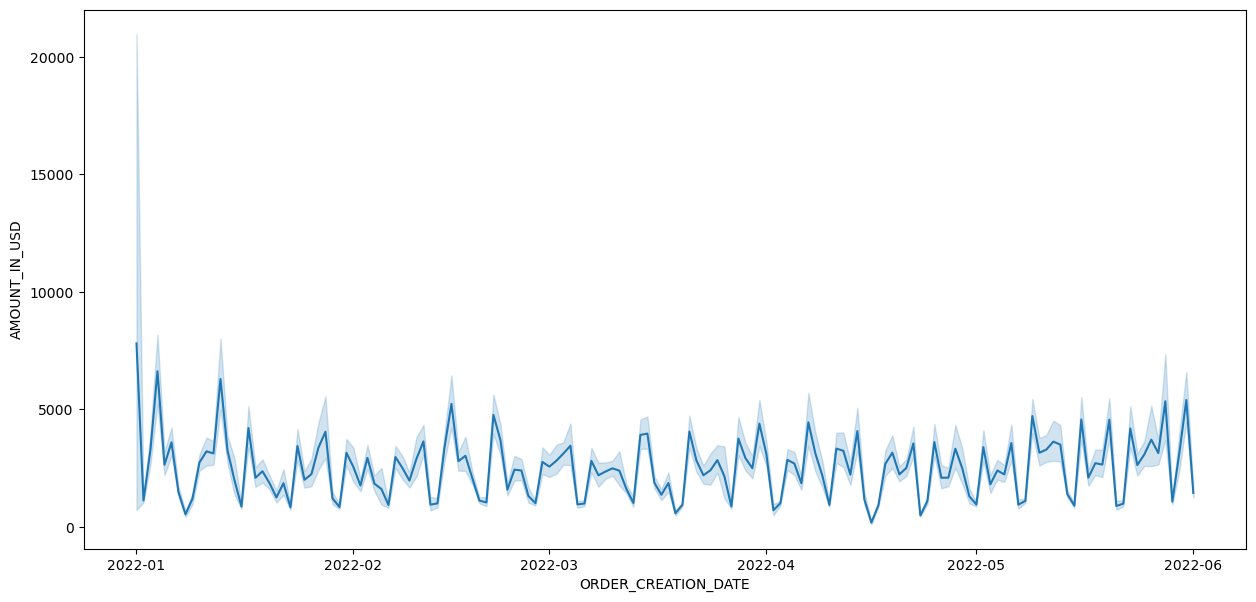

In [37]:
plt.figure(figsize=(15,7))
sns.lineplot(x='ORDER_CREATION_DATE',y='AMOUNT_IN_USD',data=data)

5. Creating a boxplot on feature 'Order Amount'

<Axes: >

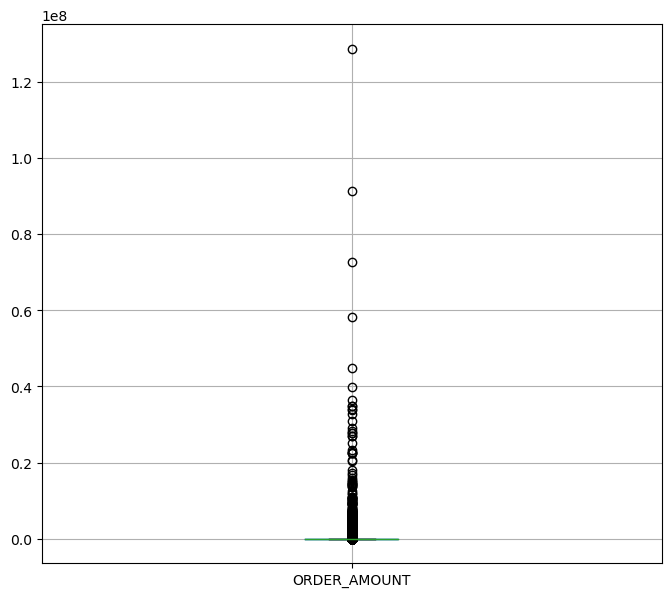

In [39]:
plt.figure(figsize=(8,7))
data.boxplot('ORDER_AMOUNT')

6.Creating a bar chart on 'Company_code' and 'Order Amount'¶

<Axes: xlabel='COMPANY_CODE', ylabel='ORDER_AMOUNT'>

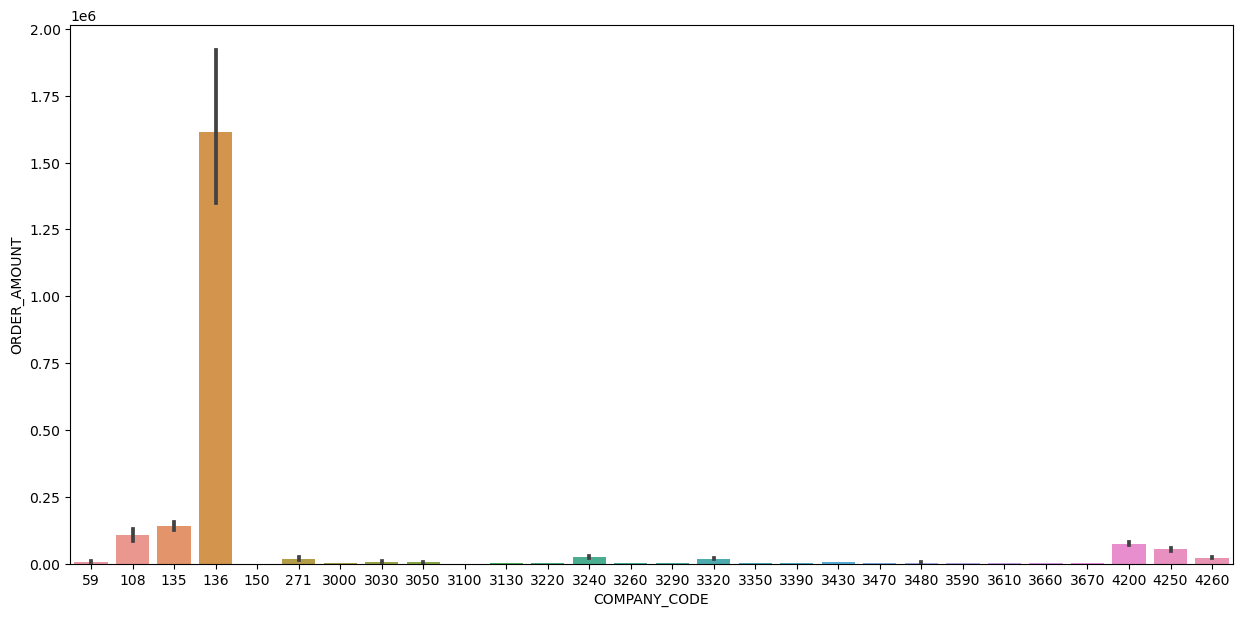

In [40]:
plt.figure(figsize=(15,7))
sns.barplot(x='COMPANY_CODE',y='ORDER_AMOUNT',data=data)